In [335]:
#!pip install imageio

In [336]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
import src.graph as graph
import src.estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx

from IPython.display import display
from pyvis.network import Network

import pickle

np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [435]:
# beta should be higher than c
n = 100 # number of nodes - 585 similar to c elegans
p = 0  # number of neighbouts to take into account

alpha = -0.3    #  negative 0.003
beta  = -0.3    #  negative the higher the more concentrated will be the edges into a single vertex 0.003
sigma = np.log(1/1e-3 - 1)    # intercept the higher the harder for creating edges 6

threshold   = 0.5
n_iteration = 11
warm_up     = 11

################################################
params_dict = {
    "n": n,
    "p": p,
    "alpha": alpha,
    "beta": beta,
    "sigma": sigma,
    "threshold": threshold,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [436]:
graph_model = graph.GraphModel(n=n, p=p, alpha=alpha, beta=beta, sigma=sigma, threshold=threshold)
graphs, spec = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10


In [437]:
g = graphs[-1]
s = spec[-1]

ut = utils.GraphUtils()

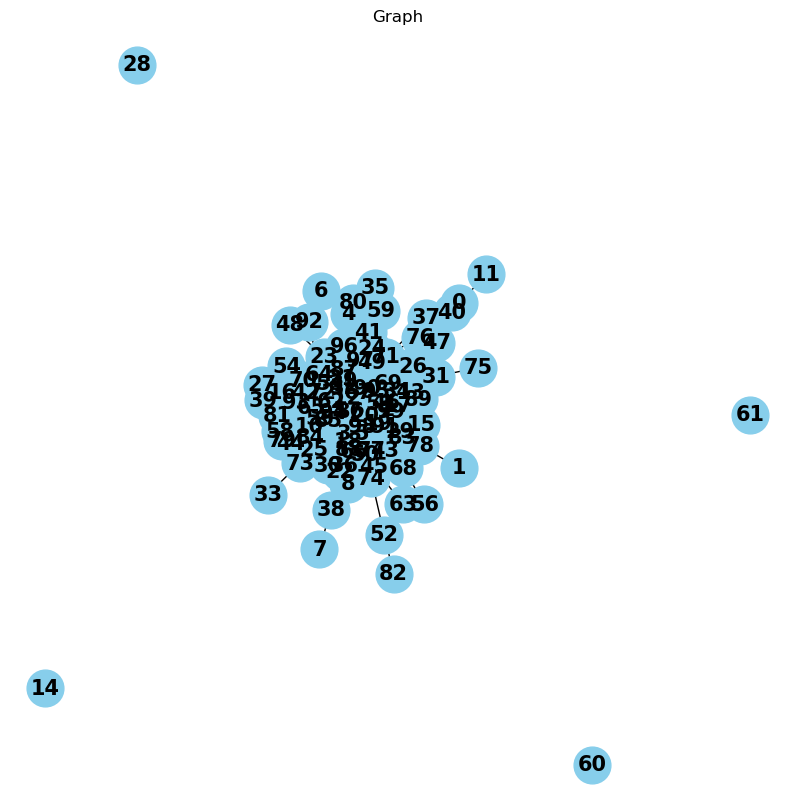

In [438]:
ut.plot_graph_from_adjacency(adj_matrix=g, pos=None, title='Graph', size=(10, 10))

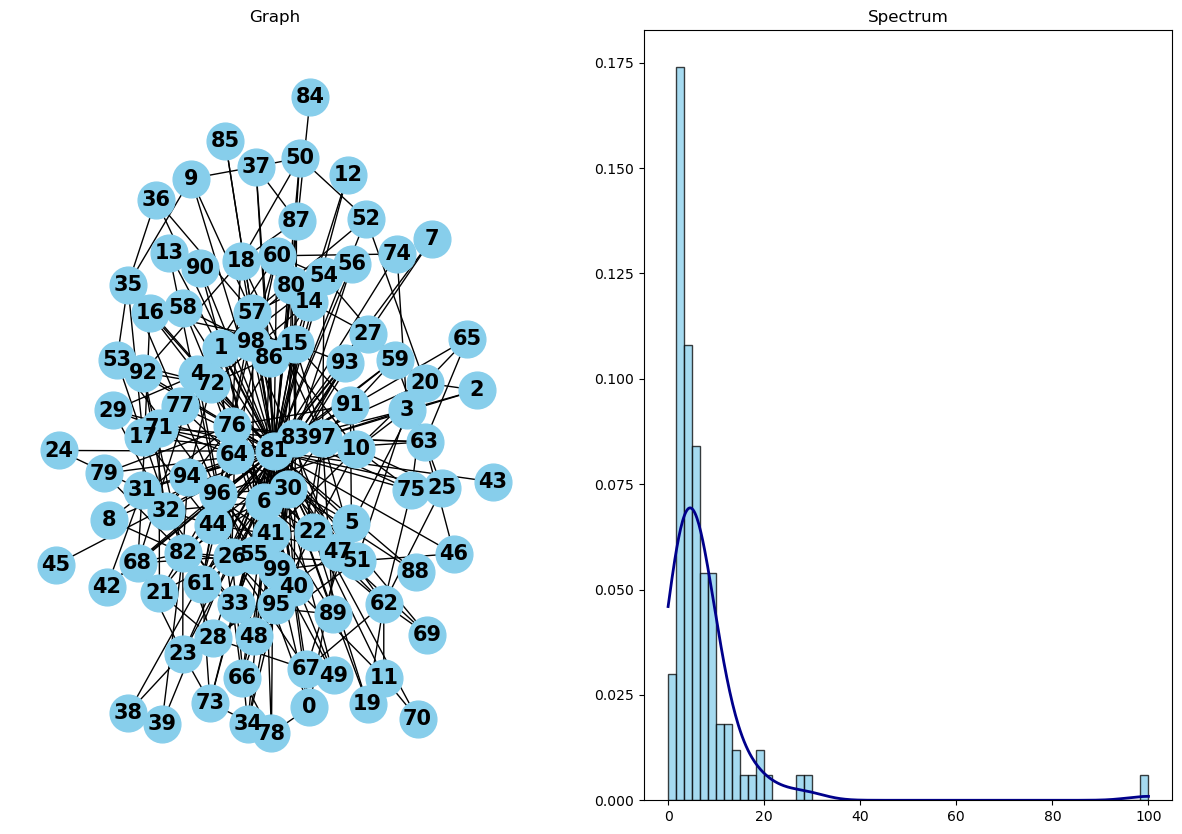

In [421]:
ut.plot_graph_and_spectrum(adj_matrix=g, spectrum=s, pos=None, title=None, size=(15, 10))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


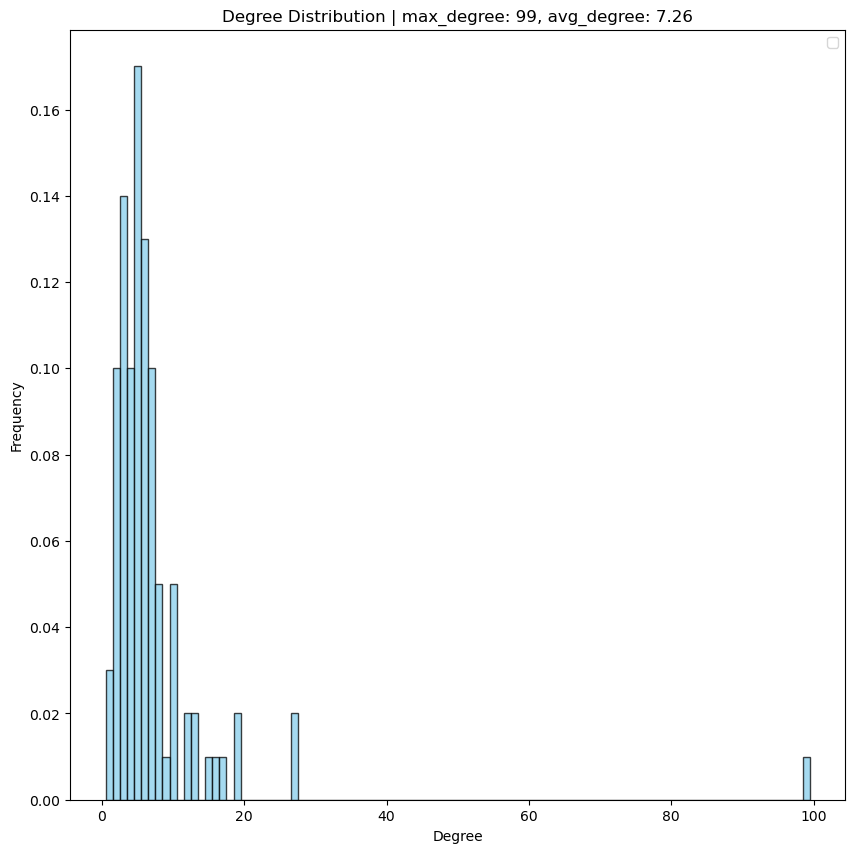

In [422]:
ut.plot_degree_distribution(adj_matrix = g, title='Degree Distribution', size=(10,10))

In [423]:
assert 1==2

AssertionError: 

# Saving the graph

In [424]:
ut = utils.GraphUtils()
ut.saving_graph_artifacts(params_dict=params_dict, graphs=graphs, spec=spec)

../data/input/graph_data_n=100_p=0_alpha=-0.3_beta=-0.3_sigma=6.906754778648554_threshold=0.5_n_iteration=12_warm_up=12.pickle
../data/input/spec_data_n=100_p=0_alpha=-0.3_beta=-0.3_sigma=6.906754778648554_threshold=0.5_n_iteration=12_warm_up=12.pickle


In [425]:
ut.save_graph_html(g, params_dict=params_dict)

../data/output/graph_n=100_p=0_alpha=-0.3_beta=-0.3_sigma=6.906754778648554_threshold=0.5_n_iteration=12_warm_up=12.html


In [426]:
np.pi

3.141592653589793